In [26]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from sklearn.preprocessing import StandardScaler

In [27]:
input_file_path = 'downloaded_audio_files/alafasy/surah_1/001001.mp3'
y_old, sr_old = librosa.load(input_file_path, sr=None)
print(f'Original Sample Rate: {sr_old} Hz')
print(f'Original Number of Samples: {len(y_old)}')


Original Sample Rate: 44100 Hz
Original Number of Samples: 265972


In [28]:
from pydub import AudioSegment
output_wav='output_audio.wav'
def convert_to_wav(input_file_path, output_wav):
    try:
        audio = AudioSegment.from_file(input_file_path)
        audio.export(output_wav, format="wav")
        print("Audio file converted to WAV format successfully.")
    except FileNotFoundError:
        print(f"Error: The file at {input_file_path} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
convert_to_wav(input_file_path, output_wav)

# output_wav2='/content/output_audio2.wav'
# def convert_to_wav(input_file_path2, output_wav2):
#     try:
#         audio = AudioSegment.from_file(input_file_path2)
#         audio.export(output_wav2, format="wav")
#         print("Audio file 2 converted to WAV format successfully.")
#     except FileNotFoundError:
#         print(f"Error: The file at {input_file_path2} was not found.")
#     except Exception as e:
#         print(f"An unexpected error occurred: {e}")
# convert_to_wav(input_file_path2, output_wav2)

Audio file converted to WAV format successfully.


In [29]:
y, sr = librosa.load(output_wav, sr=None)
print(f'Original Sample Rate: {sr} Hz')
print(f'Original Number of Samples: {len(y)}')

# y2, sr2 = librosa.load(output_wav2, sr=None)
# print(f'Original Sample Rate: {sr2} Hz')
# print(f'Original Number of Samples: {len(y2)}')

Original Sample Rate: 44100 Hz
Original Number of Samples: 265972


In [30]:
def normalize_audio(y, target_db=-16.0):
    RMS = np.sqrt(np.mean(y**2))
    target_rms = 10**(target_db / 20.0)
    scaling_factor = target_rms / RMS
    return y * scaling_factor

# def normalize_audio(y2, target_db=-16.0):
#     RMS2 = np.sqrt(np.mean(y2**2))
#     target_rms2 = 10**(target_db / 20.0)
#     scaling_factor2 = target_rms2 / RMS2
#     return y2 * scaling_factor2

In [31]:
def calculate_rms(output_wav):
    return np.sqrt(np.mean(output_wav**2))

normalized_audio = normalize_audio(y)

# def calculate_rms(output_wav2):
#     return np.sqrt(np.mean(output_wav2**2))

# normalized_audio2 = normalize_audio(y2)

In [32]:
original_rms = calculate_rms(y)
normalized_rms = calculate_rms(normalized_audio)
print(f'Original RMS: {original_rms}')
print(f'Normalized RMS: {normalized_rms}')


# original_rms2 = calculate_rms(y2)
# normalized_rms2 = calculate_rms(normalized_audio2)
# print(f'Original RMS: {original_rms2}')
# print(f'Normalized RMS: {normalized_rms2}')

Original RMS: 0.08185748010873795
Normalized RMS: 0.15848931670188904


In [33]:
duration = librosa.get_duration(y=y, sr=sr)
print(f'Audio Duration: {duration:.2f} seconds')
frame_length_ms = 30
frame_length = int(sr * (frame_length_ms / 1000))
hop_length = frame_length // 2
STFT = librosa.stft(y, n_fft=frame_length, hop_length=hop_length)
print(f'STFT Shape: {STFT.shape}')

# duration2= librosa.get_duration(y=y2, sr=sr2)
# print(f'Audio Duration: {duration2:.2f} seconds')
# frame_length_ms2 = 30
# frame_length2 = int(sr * (frame_length_ms2 / 1000))
# hop_length2 = frame_length2 // 2
# STFT2 = librosa.stft(y2, n_fft=frame_length2, hop_length=hop_length2)
# print(f'STFT Shape: {STFT2.shape}')


Audio Duration: 6.03 seconds
STFT Shape: (662, 403)


In [34]:
n_mels = 80
mel_spectrogram = librosa.feature.melspectrogram(S=np.abs(STFT)**2, sr=sr, n_fft=frame_length, hop_length=hop_length, n_mels=n_mels)
MFCC = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrogram), sr=sr, n_mfcc=n_mels)
MFCC_mean = np.mean(MFCC, axis=1)
print(f'MFCCs Shape: {MFCC_mean.shape}')

# mel_spectrogram2 = librosa.feature.melspectrogram(S=np.abs(STFT2)**2, sr=sr2, n_fft=frame_length2, hop_length=hop_length2, n_mels=n_mels)
# MFCC2 = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrogram2), sr=sr2, n_mfcc=n_mels)
# MFCC_mean2 = np.mean(MFCC2, axis=1)
# print(f'MFCCs Shape: {MFCC_mean2.shape}')

MFCCs Shape: (80,)


In [35]:
scaler = StandardScaler()
mfccs_normalized = scaler.fit_transform(MFCC_mean.reshape(-1, 1))
print(f'MFCCs Normalized Shape: {mfccs_normalized.shape}')
print(mfccs_normalized)

# scaler2 = StandardScaler()
# mfccs_normalized2 = scaler2.fit_transform(MFCC_mean2.reshape(-1, 1))
# print(f'MFCCs Normalized Shape: {mfccs_normalized2.shape}')
# print(mfccs_normalized2)

MFCCs Normalized Shape: (80, 1)
[[-7.83777237e+00]
 [ 3.73614311e+00]
 [ 1.58009216e-01]
 [ 1.17332530e+00]
 [ 4.94053997e-02]
 [ 1.10707808e+00]
 [-6.14235699e-01]
 [ 5.86908460e-01]
 [ 3.34084630e-02]
 [-3.63130987e-01]
 [-2.71765236e-03]
 [-3.73305380e-01]
 [-3.61943454e-01]
 [ 3.74580137e-02]
 [ 9.46191028e-02]
 [-4.25731361e-01]
 [-7.41229281e-02]
 [ 1.02092110e-01]
 [-2.46102568e-02]
 [-4.22947496e-01]
 [ 4.09326553e-02]
 [ 1.78029194e-01]
 [-8.61567035e-02]
 [ 8.21124464e-02]
 [-1.38088372e-02]
 [-5.87367490e-02]
 [ 8.51410106e-02]
 [ 9.84300673e-02]
 [ 4.16871021e-03]
 [-1.06463045e-01]
 [ 7.05594867e-02]
 [ 7.97734484e-02]
 [-1.26516193e-01]
 [ 1.70549065e-01]
 [ 2.77343392e-02]
 [-3.34635489e-02]
 [ 9.19820890e-02]
 [ 2.79992521e-02]
 [ 6.09821305e-02]
 [-3.98913659e-02]
 [ 3.52974385e-02]
 [-2.58242283e-02]
 [-7.44075105e-02]
 [ 2.74381470e-02]
 [-4.04728530e-03]
 [ 3.49953249e-02]
 [ 2.82604229e-02]
 [ 4.95815389e-02]
 [ 2.15358660e-02]
 [ 7.42674572e-03]
 [ 8.21236968e-02]

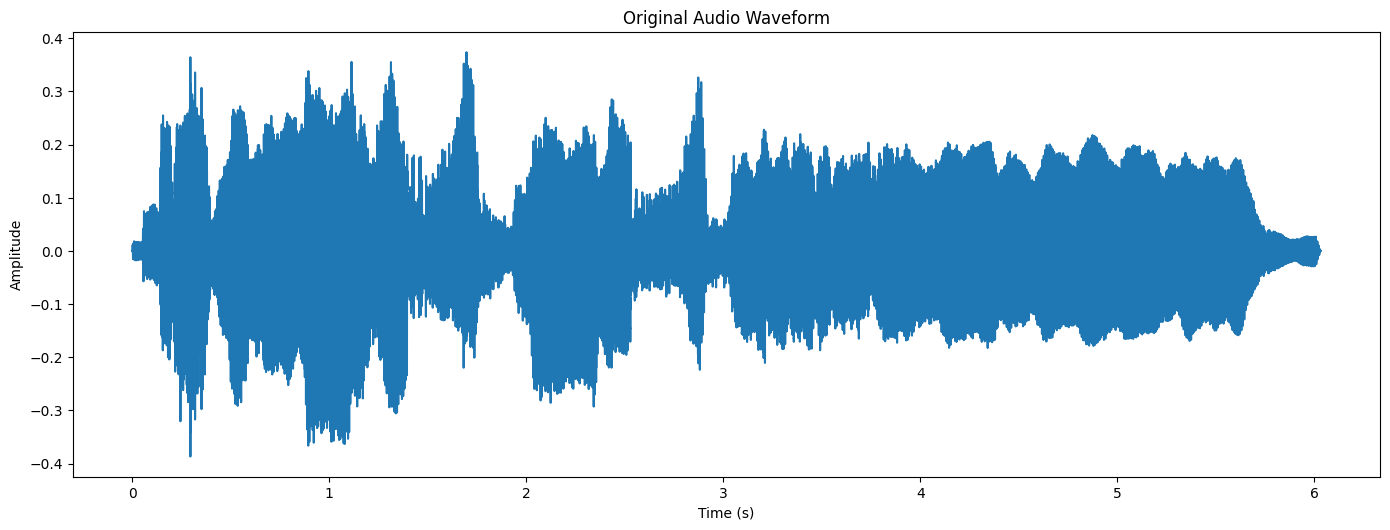

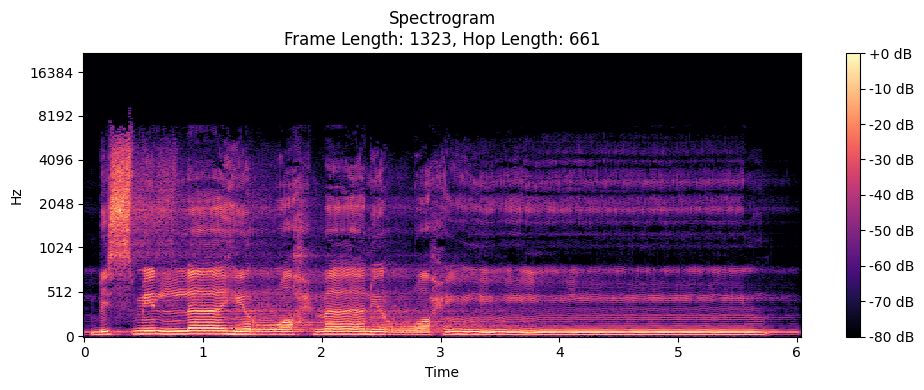

In [36]:
time_original = np.arange(len(y)) / sr
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(time_original, y)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(np.abs(STFT)**2, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram\nFrame Length: {frame_length}, Hop Length: {hop_length}')
plt.tight_layout()
plt.show()

In [39]:
import speech_recognition as sr

def transcribe_audio(output_wav):
    recognizer = sr.Recognizer()

    try:
        with sr.AudioFile(output_wav) as source:
            audio = recognizer.record(source)
            text = recognizer.recognize_google(audio)
            return text

    except sr.UnknownValueError:
        print(f"Google Speech Recognition could not understand audio in {output_wav}.")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None

text1 = transcribe_audio("output_audio.wav")
print("Text from audio 1:", text1)


Text from audio 1: bismillahir rahmanir Rahim


In [40]:
from translate import Translator

translator = Translator(to_lang="ar")
english_text = text1
translation = translator.translate(english_text)

print("Original Text:", english_text)
print("Translated Text:", translation)


Original Text: bismillahir rahmanir Rahim
Translated Text: bismillahi


In [ ]:
import whisper

def transcribe_audio_whisper(input_file_path):
   model = whisper.load_model("base")
   result = model.transcribe(input_file_path)
   return result['text']


text1 = transcribe_audio(output_wav)
print("Text from audio 1:", text1)
